In [34]:
import math
import numpy
from matplotlib import pyplot

In [35]:
M=60
x_begin=-2 
x_end=2
y_begin=-1 
y_end=1

In [36]:
x=numpy.linspace(x_begin,x_end,M)
y=numpy.linspace(y_begin,y_end,M)
print ("x=",x)
print ("y=",y)
xx,yy=numpy.meshgrid(x,y)

x= [-2.         -1.93220339 -1.86440678 -1.79661017 -1.72881356 -1.66101695
 -1.59322034 -1.52542373 -1.45762712 -1.38983051 -1.3220339  -1.25423729
 -1.18644068 -1.11864407 -1.05084746 -0.98305085 -0.91525424 -0.84745763
 -0.77966102 -0.71186441 -0.6440678  -0.57627119 -0.50847458 -0.44067797
 -0.37288136 -0.30508475 -0.23728814 -0.16949153 -0.10169492 -0.03389831
  0.03389831  0.10169492  0.16949153  0.23728814  0.30508475  0.37288136
  0.44067797  0.50847458  0.57627119  0.6440678   0.71186441  0.77966102
  0.84745763  0.91525424  0.98305085  1.05084746  1.11864407  1.18644068
  1.25423729  1.3220339   1.38983051  1.45762712  1.52542373  1.59322034
  1.66101695  1.72881356  1.79661017  1.86440678  1.93220339  2.        ]
y= [-1.         -0.96610169 -0.93220339 -0.89830508 -0.86440678 -0.83050847
 -0.79661017 -0.76271186 -0.72881356 -0.69491525 -0.66101695 -0.62711864
 -0.59322034 -0.55932203 -0.52542373 -0.49152542 -0.45762712 -0.42372881
 -0.38983051 -0.3559322  -0.3220339  -0.2881

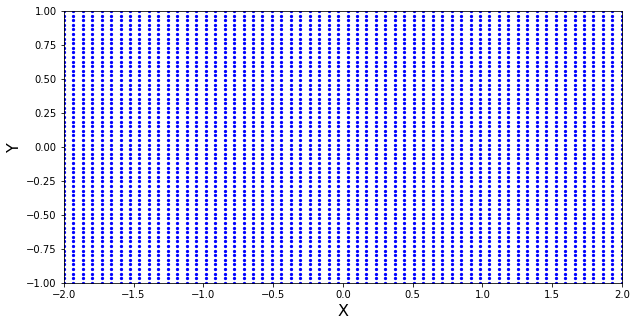

In [37]:
%matplotlib inline 
thick=10.0
h=(y_begin-y_end)/(x_begin-x_end)*thick
pyplot.figure(figsize=(thick,h))
pyplot.xlabel("X",fontsize=16)
pyplot.ylabel("Y",fontsize=16)
pyplot.xlim(x_begin,x_end)
pyplot.ylim(y_begin,y_end)
pyplot.scatter(xx,yy,s=5,color="blue",marker='o')


## Defining a source point and calculating its velocity components

In [38]:
u_infinite = 1.0
u_free = u_infinite*numpy.ones((M,M),dtype=float)
v_free = numpy.zeros((M,M),dtype=float)
si_stream=u_infinite*yy

In [39]:
strength=5
x_source=-1.0
y_source=0.0
u_source = (strength/(2*math.pi)) *  (xx-x_source) / ((xx-x_source)**2+(yy-y_source)**2 )+u_free
v_source = (strength/(2*math.pi)) * (yy-y_source) / ((xx-x_source)**2+(yy-y_source)**2)+v_free
q=((xx-x_source)**2)+((yy-y_source)**2)
z=numpy.sqrt(q)
p=(strength/(2*math.pi))*(numpy.log1p(z))
x_stagnation = x_source
y_stagnation = y_source
psi_source = strength / (2 * numpy.pi) * numpy.arctan2((yy - y_source), (xx - x_source))
psi = si_stream + psi_source


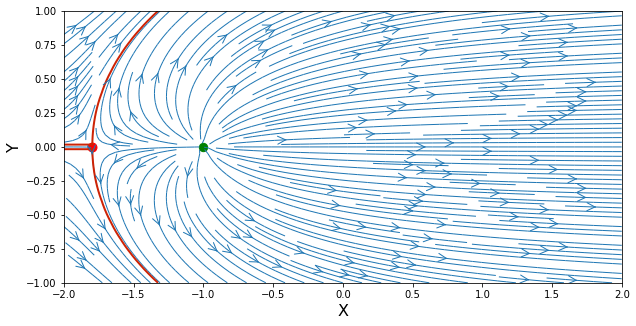

In [40]:
thick=10.0
h=(y_begin-y_end)/(x_begin-x_end)*thick
pyplot.figure(figsize=(thick,h))
pyplot.xlabel("X",fontsize=16)
pyplot.ylabel("Y",fontsize=16)
pyplot.xlim(x_begin,x_end)
pyplot.ylim(y_begin,y_end)
pyplot.streamplot(xx,yy,u_source,v_source,density=2
                ,linewidth=1,arrowsize=2,arrowstyle='->')
pyplot.scatter(x_source,y_source,color='green',s=70,marker='o')
x_stagnation = x_source - strength / (2 * numpy.pi * u_infinite)
y_stagnation = y_source
pyplot.scatter(x_stagnation, y_stagnation, color='r', s=80, marker='o')

pyplot.contour(xx, yy,psi,
               levels=[-strength / 2, strength / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');
               



## Now its time for sink flow plot

[[ 1.23873241  1.24311501  1.24763341 ...,  0.60629955  0.60309115
   0.60211264]
 [ 1.24033418  1.24481501  1.24943947 ...,  0.59068613  0.58841426
   0.58839647]
 [ 1.24190124  1.24647911  1.25120844 ...,  0.57438924  0.57317538
   0.57422506]
 ..., 
 [ 1.24190124  1.24647911  1.25120844 ...,  0.57438924  0.57317538
   0.57422506]
 [ 1.24033418  1.24481501  1.24943947 ...,  0.59068613  0.58841426
   0.58839647]
 [ 1.23873241  1.24311501  1.24763341 ...,  0.60629955  0.60309115
   0.60211264]] [[ 0.07957747  0.08291206  0.0864519  ...,  0.45545738  0.42577494
   0.39788736]
 [ 0.07739575  0.08066159  0.08413047 ...,  0.45746844  0.4265525
   0.39765087]
 [ 0.07516705  0.07836041  0.08175423 ...,  0.45899199  0.42682462
   0.39690885]
 ..., 
 [-0.07516705 -0.07836041 -0.08175423 ..., -0.45899199 -0.42682462
  -0.39690885]
 [-0.07739575 -0.08066159 -0.08413047 ..., -0.45746844 -0.4265525
  -0.39765087]
 [-0.07957747 -0.08291206 -0.0864519  ..., -0.45545738 -0.42577494
  -0.39788736]]


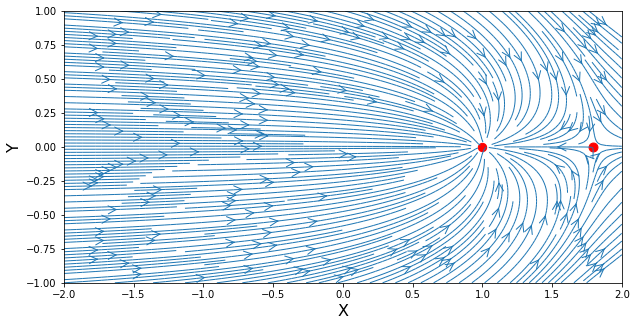

In [46]:
strength=-5
x_sin=1.0
y_sin=0.0
u_sin=(strength/(2*math.pi))*(xx-x_sin)/((xx-x_sin)**2+(yy-y_sin)**2)+u_free
v_sin=(strength/(2*math.pi))*(yy-y_sin)/((xx-x_sin)**2+(yy-y_sin)**2)+v_free
q=((xx-x_sin)**2)+((yy-y_sin)**2)
z=numpy.sqrt(q)
p=(strength/(2*math.pi))*(numpy.log1p(z))
psi_sin = strength / (2 * numpy.pi) * numpy.arctan2((yy - y_sin), (xx - x_sin))
psi = si_stream + psi_sin
x_stagnation = -strength / (2 * numpy.pi * u_infinite)+x_sin
y_stagnation = y_sin

               

print (u_sin,v_sin)
thick=10.0
h=(y_begin-y_end)/(x_begin-x_end)*thick
pyplot.figure(figsize=(thick,h))
pyplot.xlabel("X",fontsize=16)
pyplot.ylabel("Y",fontsize=16)
pyplot.xlim(x_begin,x_end)
pyplot.ylim(y_begin,y_end)
pyplot.streamplot(xx,yy,u_sin,v_sin,density=3,linewidth=1,arrowsize=2,arrowstyle='->')
pyplot.scatter(x_sin,y_sin,color='red',s=70,marker='o');
pyplot.scatter(x_stagnation, y_stagnation, color='r', s=80, marker='o')

pyplot.contour(xx, yy,psi,
               levels=[+strength / 2, -strength / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');
               

## source+sink together

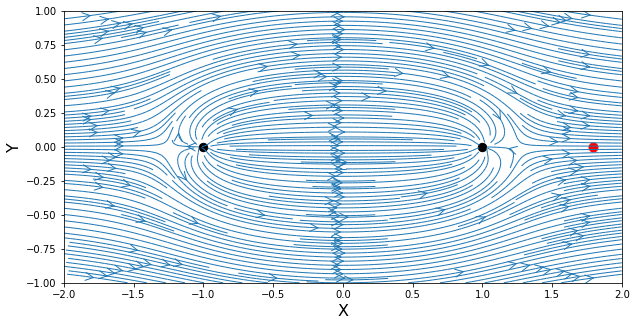

In [50]:
u_final=u_source+u_sin+u_free
v_final=v_source+v_sin+v_free
psi_pair = psi_source+psi_sin

x_stagnation = -strength / (2 * numpy.pi * u_infinite)+x_sin
y_stagnation = y_sin

thick=10.0
h=(y_begin-y_end)/(x_begin-x_end)*thick
pyplot.figure(figsize=(thick,h))
pyplot.xlabel("X",fontsize=16)
pyplot.ylabel("Y",fontsize=16)
pyplot.xlim(x_begin,x_end)
pyplot.ylim(y_begin,y_end)
pyplot.streamplot(xx,yy,u_final,v_final,density=3,linewidth=1,arrowsize=2,arrowstyle='->')
pyplot.scatter([x_source,x_sin],[y_source,y_sin],color='black',s=70,marker='o');
pyplot.scatter(x_stagnation, y_stagnation, color='r', s=80, marker='o')

pyplot.contour(xx, yy,psi_pair,
               levels=[+strength / 2, -strength / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');


# 

# Pair plotting still left